In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import timedelta
import seaborn as sns


In [2]:
from scipy import signal
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
def pd_dttm_import(want_cols):
    '''Parameters: takes in list of column names wanted that will be
    used in pandas .read_csv method
    
    Results: Outputs the indices of the columns names that are date
    values and uses resulting list of indices as parse_dates parameter
    in pandas .read_csv method'''
    dt_ind = []
    for i in want_cols:
        if 'dttm' in i.lower() or 'date' in i.lower():
            dt_ind.append(want_cols.index(i))
    return dt_ind

In [5]:


col_of_interest = ['Call Number', 'Call Type',
       'Call Date', 'Received DtTm',
       'Final Priority',
       'Call Type Group', 'Unit Type',
       'Neighborhooods - Analysis Boundaries']



In [6]:
import boto3

In [7]:
s3 = boto3.client('s3')

In [8]:
s3.list_buckets()

{'ResponseMetadata': {'RequestId': 'BABE639B32167DE1',
  'HostId': 'oAPaTLYefAhzJ1Vjsy8y5XnnUTCIU4s9u5yKGjYCIE6UI9W9Dh2QYfof8GnPOIgM4YiS62QtfVc=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'oAPaTLYefAhzJ1Vjsy8y5XnnUTCIU4s9u5yKGjYCIE6UI9W9Dh2QYfof8GnPOIgM4YiS62QtfVc=',
   'x-amz-request-id': 'BABE639B32167DE1',
   'date': 'Thu, 27 Aug 2020 05:11:11 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'chris1222',
   'CreationDate': datetime.datetime(2020, 7, 13, 20, 58, 33, tzinfo=tzutc())},
  {'Name': 'pm-assessment-w3-d1',
   'CreationDate': datetime.datetime(2020, 7, 13, 22, 36, 57, tzinfo=tzutc())},
  {'Name': 'sagemaker-studio-f8nlubgby6o',
   'CreationDate': datetime.datetime(2020, 8, 24, 22, 32, 30, tzinfo=tzutc())},
  {'Name': 'sf-ems-analysis',
   'CreationDate': datetime.datetime(2020, 8, 24, 18, 48, 47, tzinfo=tzutc())}],
 'Owner': {'DisplayName': 'cabouey',
  'ID':

In [9]:
obj = s3.download_file(Bucket='sf-ems-analysis', Key='ems_data.csv', Filename='sample_ems.csv')

ProtocolError: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))

In [9]:
df = pd.read_csv(obj['Body'], usecols=col_of_interest, skiprows = (lambda x: x < 2000000 and x > 300000), parse_dates=pd_dttm_import(col_of_interest))

/home/christopher/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
df[df['Call Date'].dt.year == 2020]

Unnamed: 0  Call Number Unit ID          Call Type  Call Date  \
1                1    201560282      84   Medical Incident 2020-06-04   
2                2    201560318      70              Other 2020-06-04   
3                3    201560366      94   Medical Incident 2020-06-04   
4                4    201560488     E37   Medical Incident 2020-06-04   
5                5    201560506      62   Medical Incident 2020-06-04   
...            ...          ...     ...                ...        ...   
393421      393421    201553606      75  Traffic Collision 2020-06-03   
393422      393422    201553675     RC2  High Angle Rescue 2020-06-03   
393423      393423    201553756     E03             Alarms 2020-06-03   
393425      393425    201602508     T02   Medical Incident 2020-06-08   
393426      393426    201612936      77   Medical Incident 2020-06-09   

             Received DtTm       Dispatch DtTm       Response DtTm  \
1      2020-06-04 03:41:54 2020-06-04 03:44:27 2020-06-04 03:45:07   
2      2020-06-04 04:08:00 2020-06-04 04:08:29 2020-06-04 04:08:41   
3      2020-06-04 04:54:25 2020-06-04 04:55:04 2020-06-04 04:55:10   
4      2020-06-04 06:34:29 2020-06-04 06:36:02 2020-06-04 06:38:06   
5      2020-06-04 06:44:39 2020-06-04 06:46:50 2020-06-04 06:47:02   
...                    ...                 ...                 ...   
393421 2020-06-03 22:48:48 2020-06-03 22:52:19 2020-06-03 22:52:24   
393422 2020-06-03 23:08:42 2020-06-03 23:15:23 2020-06-03 23:17:36   
393423 2020-06-03 23:54:52 2020-06-03 23:57:05 2020-06-03 23:58:24   
393425 2020-06-08 18:00:11 2020-06-08 18:07:34 2020-06-08 18:09:13   
393426 2020-06-09 19:01:12 2020-06-09 19:02:58 2020-06-09 19:03:04   

             On Scene DtTm      Transport DtTm        Hospital DtTm  \
1      2020-06-04 03:48:29 2020-06-04 03:56:32  2020-06-04 04:02:21   
2                      NaT                 NaT                  NaN   
3      2020-06-04 04:59:39                 NaT                  NaN   
4                      NaT                 NaT                  NaN   
5      2020-06-04 06:59:01 2020-06-04 07:10:53  2020-06-04 07:29:08   
...                    ...                 ...                  ...   
393421 2020-06-03 22:55:26                 NaT                  NaN   
393422 2020-06-03 23:22:42                 NaT                  NaN   
393423 2020-06-04 00:00:12                 NaT                  NaN   
393425 2020-06-08 18:13:27                 NaT                  NaN   
393426 2020-06-09 19:07:26 2020-06-09 19:24:10  2020-06-09 19:30:41   

            Call Final Disposition       Available DtTm Battalion  \
1                 Code 2 Transport  2020-06-04 04:31:12       B05   
2                        Cancelled  2020-06-04 04:41:51       B03   
3       Patient Declined Transport  2020-06-04 05:22:01       B03   
4                 Code 3 Transport  2020-06-04 06:40:50       B10   
5                 Code 2 Transport  2020-06-04 07:58:08       B04   
...                            ...                  ...       ...   
393421                         CHP  2020-06-03 23:02:19       B06   
393422            Code 2 Transport  2020-06-04 00:34:20       B99   
393423                        Fire  2020-06-04 00:16:51       B04   
393425                   Cancelled  2020-06-08 18:16:21       B04   
393426            Code 2 Transport  2020-06-09 20:10:07       B05   

        Final Priority  ALS Unit               Call Type Group  \
1                    2      True          Non Life-threatening   
2                    2      True          Non Life-threatening   
3                    2      True          Non Life-threatening   
4                    3      True  Potentially Life-Threatening   
5                    2      True          Non Life-threatening   
...                ...       ...                           ...   
393421               3      True          Non Life-threatening   
393422               3      True                          Fire   
393423        

## Grouping and Plotting

In [11]:
df['Call Date'].min()

Timestamp('2000-04-12 00:00:00')

In [12]:
df.columns

Index(['Unnamed: 0', 'Call Number', 'Unit ID', 'Call Type', 'Call Date',
       'Received DtTm', 'Dispatch DtTm', 'Response DtTm', 'On Scene DtTm',
       'Transport DtTm', 'Hospital DtTm', 'Call Final Disposition',
       'Available DtTm', 'Battalion', 'Final Priority', 'ALS Unit',
       'Call Type Group', 'Unit Type', 'Neighborhooods - Analysis Boundaries',
       'Location'],
      dtype='object')

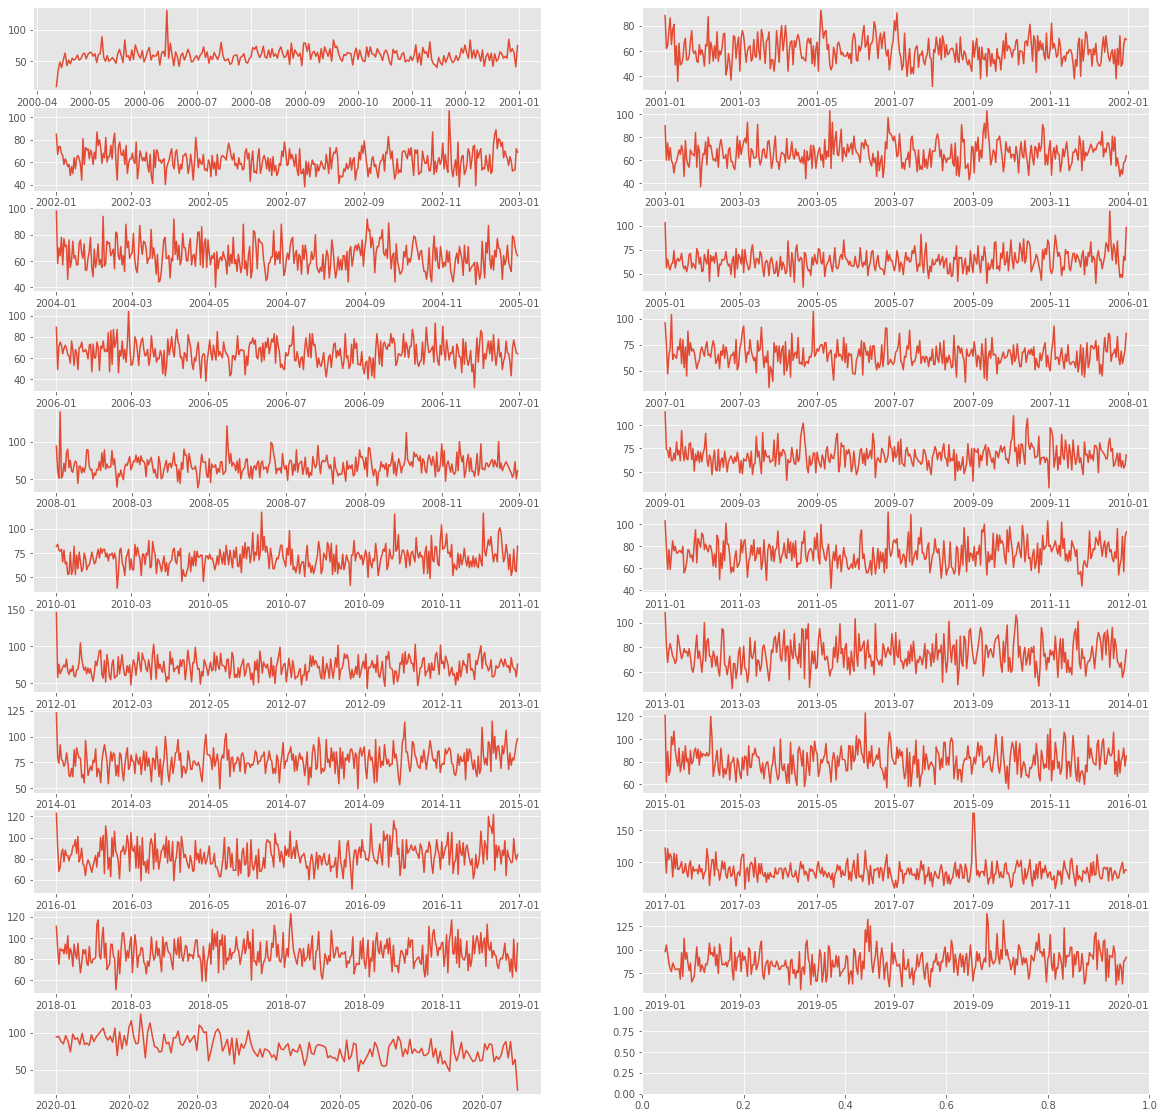

In [123]:
#plotting calls per day, one graph every year
fig, ax = plt.subplots(11,2, figsize=(20,20))
for i, axs in zip(range(2000,2021),ax.flatten()):
    group = df[df['Call Date'].dt.year == i].groupby(by='Call Date')
    axs.plot(group['Unnamed: 0'].count())

In [14]:
df['Call Date'].dt.year

0         2019
1         2020
2         2020
3         2020
4         2020
          ... 
532400    2012
532401    2012
532402    2012
532403    2012
532404    2012
Name: Call Date, Length: 532405, dtype: int64

In [15]:
df['Received DtTm'].dt.hour

0         13
1          3
2          4
3          4
4          6
          ..
532400    19
532401    17
532402    11
532403     9
532404    14
Name: Received DtTm, Length: 532405, dtype: int64

### Aggregate by TOD

In [16]:
df['Received DtTm'].dt.day

0          2
1          4
2          4
3          4
4          4
          ..
532400     6
532401    30
532402     3
532403    14
532404    31
Name: Received DtTm, Length: 532405, dtype: int64

(array([46958., 31407., 48719., 81206., 89158., 88892., 82762., 63303.]),
 array([ 0.   ,  2.875,  5.75 ,  8.625, 11.5  , 14.375, 17.25 , 20.125,
        23.   ]),
 <a list of 8 Patch objects>)

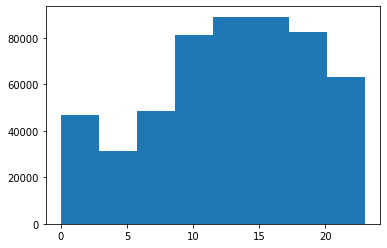

In [17]:
plt.hist(df['Received DtTm'].dt.hour, bins=8)

(array([18243., 17990., 18031., 18137., 18260., 17800., 17594., 17837.,
        17721., 17460., 17477., 17117., 17365., 17518., 17499., 17665.,
        17408., 17357., 17282., 17266., 17341., 17540., 17119., 17177.,
        17055., 17038., 17202., 17365., 15705., 15608., 10228.]),
 array([ 1.        ,  1.96774194,  2.93548387,  3.90322581,  4.87096774,
         5.83870968,  6.80645161,  7.77419355,  8.74193548,  9.70967742,
        10.67741935, 11.64516129, 12.61290323, 13.58064516, 14.5483871 ,
        15.51612903, 16.48387097, 17.4516129 , 18.41935484, 19.38709677,
        20.35483871, 21.32258065, 22.29032258, 23.25806452, 24.22580645,
        25.19354839, 26.16129032, 27.12903226, 28.09677419, 29.06451613,
        30.03225806, 31.        ]),
 <a list of 31 Patch objects>)

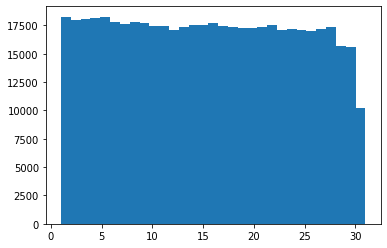

In [18]:
plt.hist(df['Received DtTm'].dt.day, bins=31)

(array([75720., 74364., 74991., 75730., 78652., 77787., 75161.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

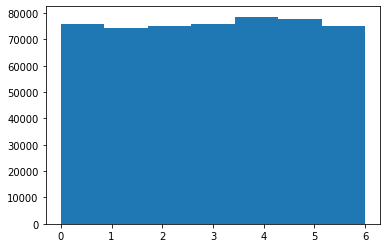

In [19]:
plt.hist(df['Received DtTm'].dt.dayofweek, bins=7)

(array([45746., 41503., 44764., 43812., 46368., 45353., 44140., 43415.,
        43698., 45405., 42422., 45779.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

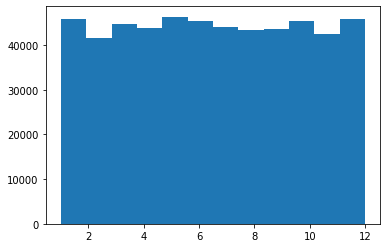

In [20]:
plt.hist(df['Received DtTm'].dt.month, bins=12)

(array([15643., 22069., 22468., 24150., 23387., 23187., 23690., 23763.,
        24923., 24526., 25694., 26975., 26456., 27223., 28101., 29594.,
        30456., 31237., 31278., 31748., 15837.]),
 array([2000.        , 2000.95238095, 2001.9047619 , 2002.85714286,
        2003.80952381, 2004.76190476, 2005.71428571, 2006.66666667,
        2007.61904762, 2008.57142857, 2009.52380952, 2010.47619048,
        2011.42857143, 2012.38095238, 2013.33333333, 2014.28571429,
        2015.23809524, 2016.19047619, 2017.14285714, 2018.0952381 ,
        2019.04761905, 2020.        ]),
 <a list of 21 Patch objects>)

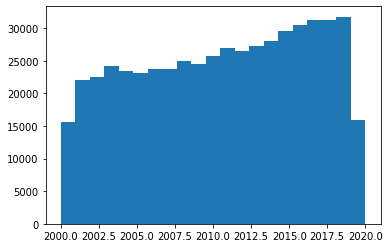

In [21]:
plt.hist(df['Received DtTm'].dt.year, bins=21)

In [22]:
len(df['Received DtTm'].dt.year.unique())


21

### Graphing Total Calls per Month - diff. call types

Text(0.5, 1.0, 'Total Calls per Month by Year')

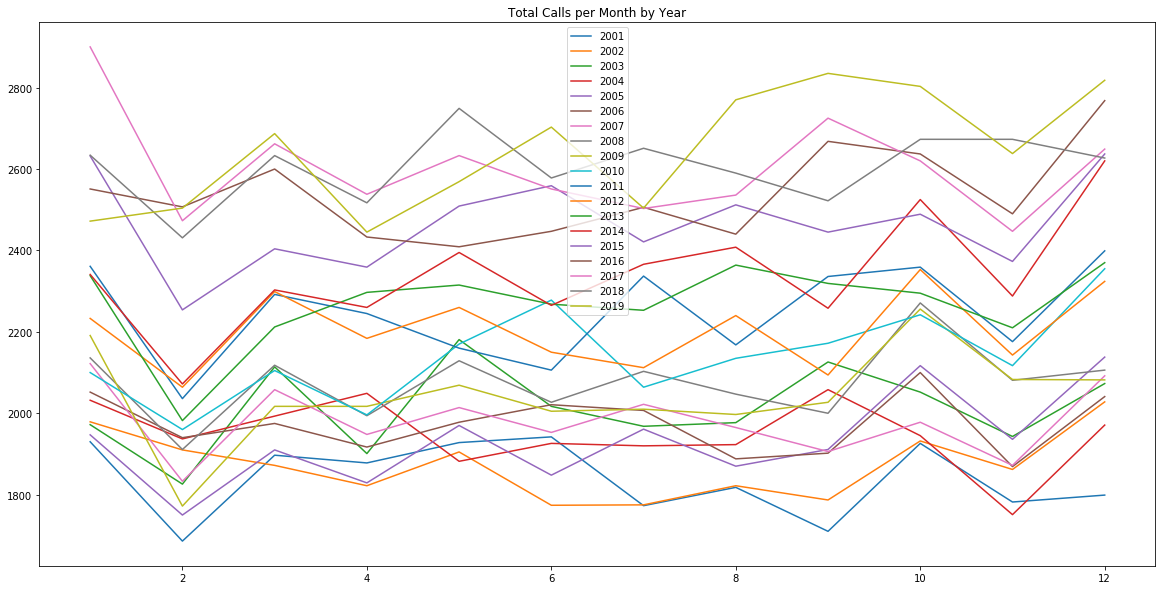

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
for i in range(2001,2020):
    ax.plot(df[df['Call Date'].dt.year == i]['Received DtTm'].dt.month.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Calls per Month by Year')

In [24]:
df['Call Type'].value_counts()

Medical Incident                                347415
Structure Fire                                   66645
Alarms                                           58224
Traffic Collision                                21767
Other                                             8436
Citizen Assist / Service Call                     8021
Outside Fire                                      6410
Water Rescue                                      2682
Vehicle Fire                                      2488
Gas Leak (Natural and LP Gases)                   2093
Electrical Hazard                                 1637
Elevator / Escalator Rescue                       1484
Odor (Strange / Unknown)                          1273
Smoke Investigation (Outside)                     1237
Fuel Spill                                         596
HazMat                                             420
Industrial Accidents                               320
Explosion                                          266
Train / Ra

Text(0.5, 1.0, 'Total Medical Incident Calls per Month by Year')

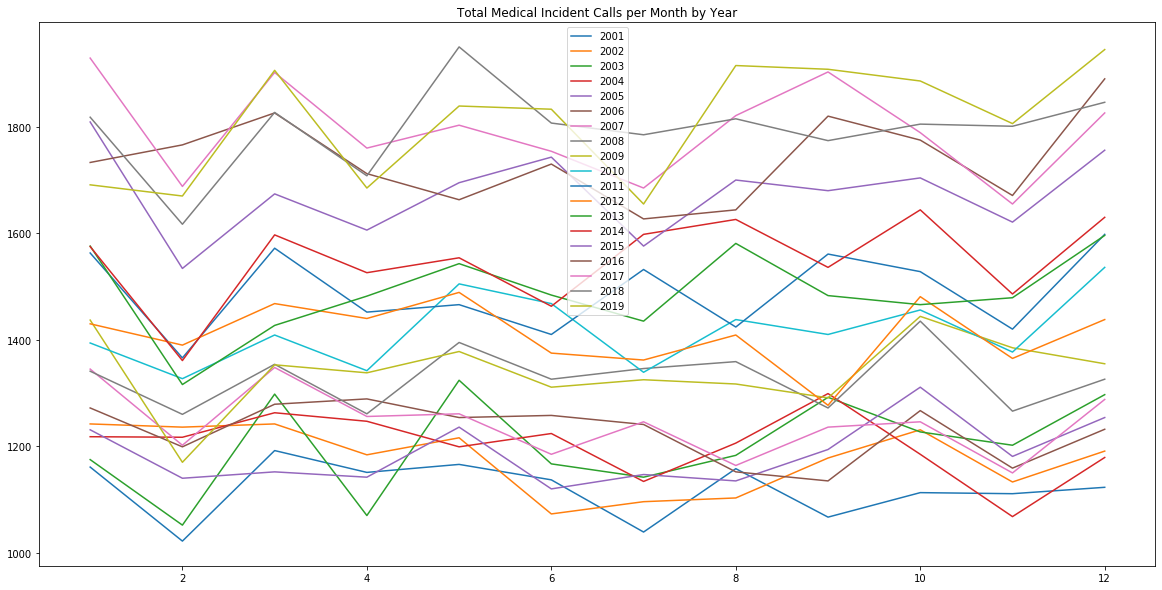

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df[df['Call Type'] == 'Medical Incident']
for i in range(2001,2020):
    ax.plot(df1[df1['Call Date'].dt.year == i]['Received DtTm'].dt.month.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Medical Incident Calls per Month by Year')

Text(0.5, 1.0, 'Total Structure Fire Calls per Month by Year')

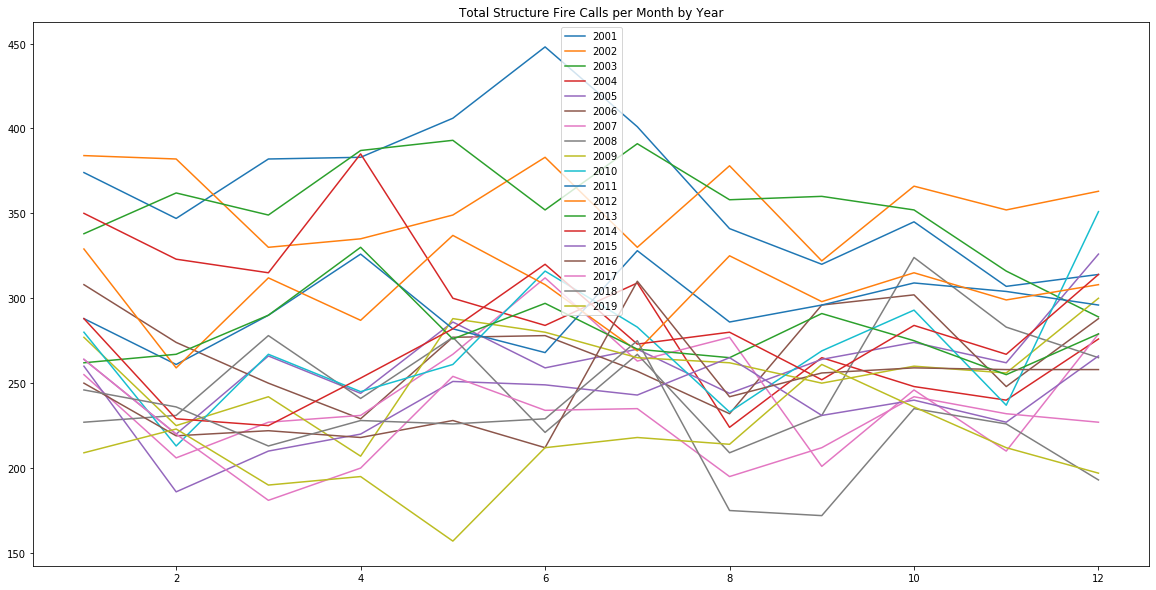

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df[df['Call Type'] == 'Structure Fire']
for i in range(2001,2020):
    ax.plot(df1[df1['Call Date'].dt.year == i]['Received DtTm'].dt.month.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Structure Fire Calls per Month by Year')

Text(0.5, 1.0, 'Total Alarms Calls per Month by Year')

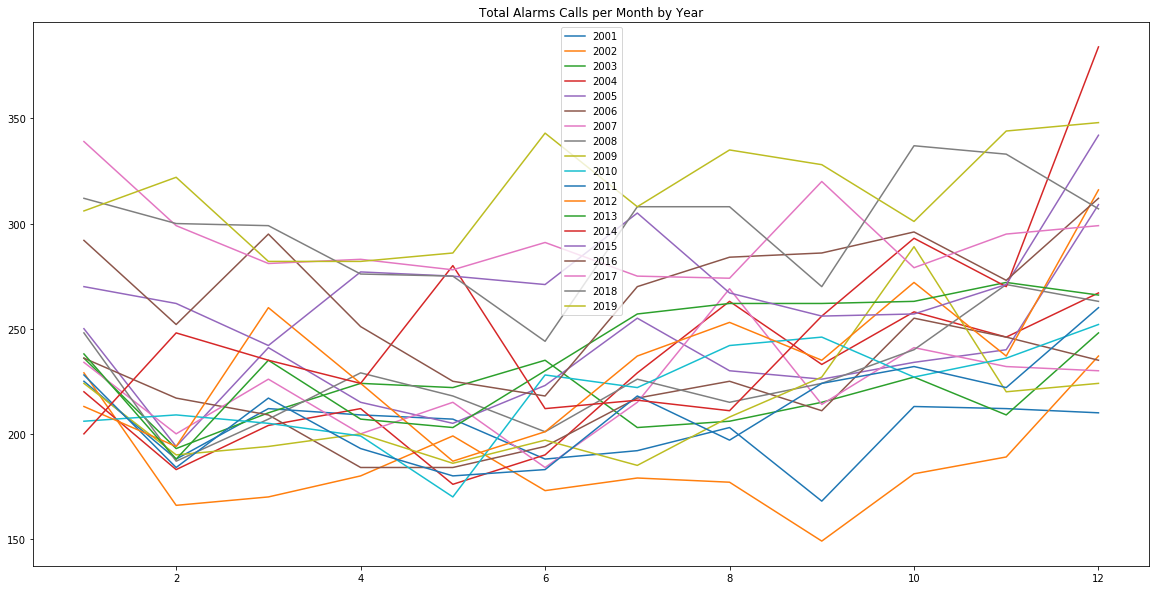

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df[df['Call Type'] == 'Alarms']
for i in range(2001,2020):
    ax.plot(df1[df1['Call Date'].dt.year == i]['Received DtTm'].dt.month.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Alarms Calls per Month by Year')

In [28]:
len(df)

532405

### Graphing Total Calls per TOD (8 segments per day)

Text(0.5, 1.0, 'Total Calls per TOD by Year')

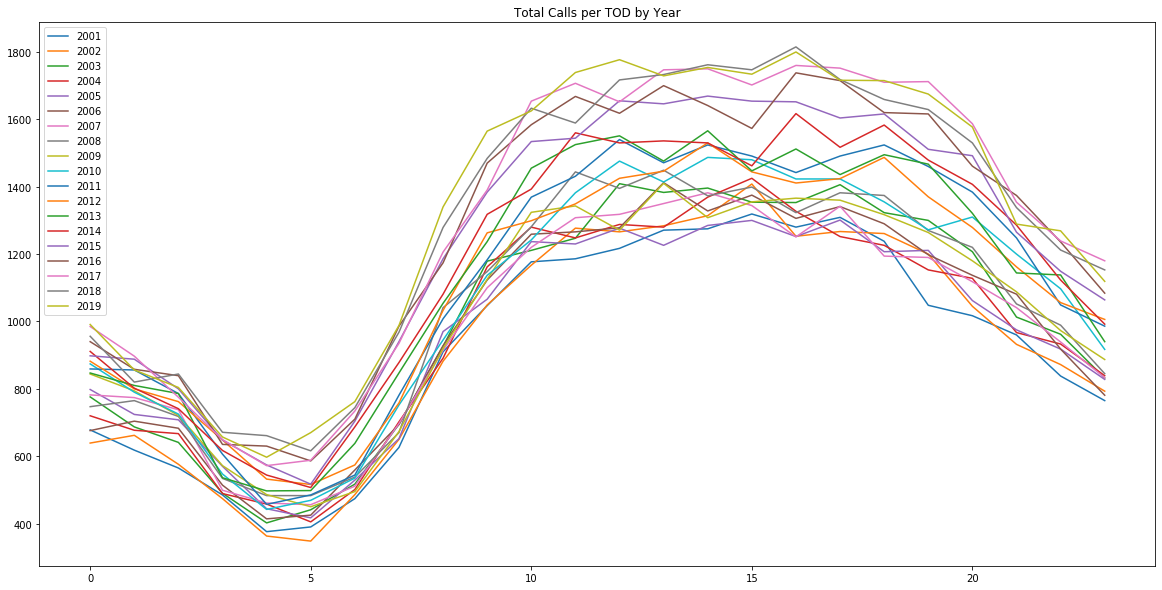

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
#df1 = df[df['Call Type'] == 'Alarms']
for i in range(2001,2020):
    ax.plot(df[df['Call Date'].dt.year == i]['Received DtTm'].dt.hour.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Calls per TOD by Year')

Text(0.5, 1.0, 'Total Medican Incident Calls per TOD by Year')

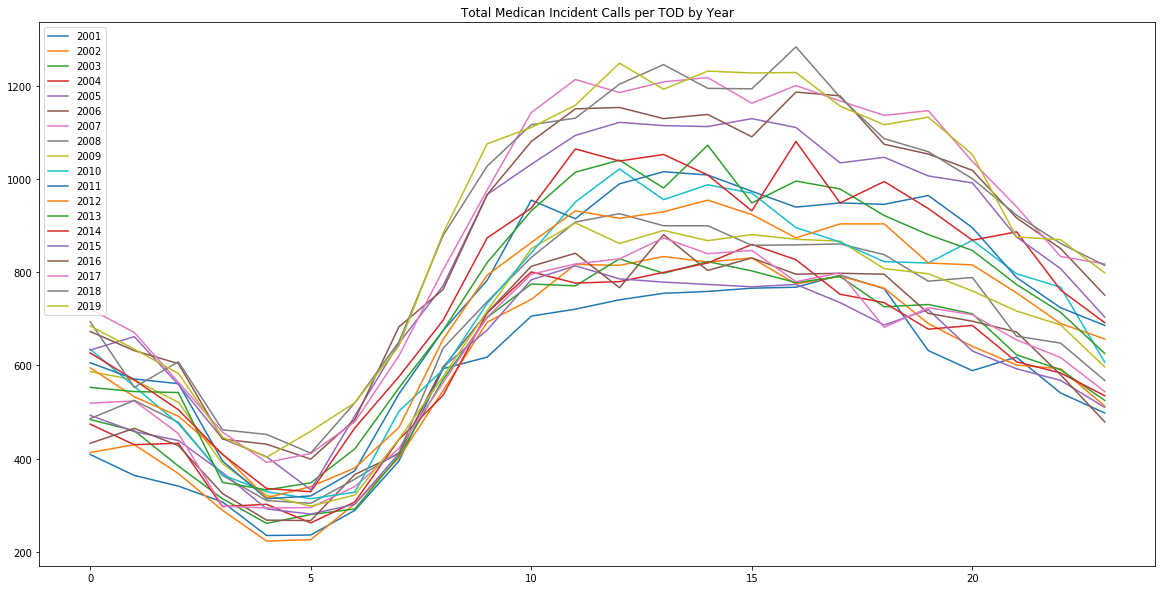

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df[df['Call Type'] == 'Medical Incident']
for i in range(2001,2020):
    ax.plot(df1[df1['Call Date'].dt.year == i]['Received DtTm'].dt.hour.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Medican Incident Calls per TOD by Year')

Text(0.5, 1.0, 'Total Structure Fire Calls per TOD by Year')

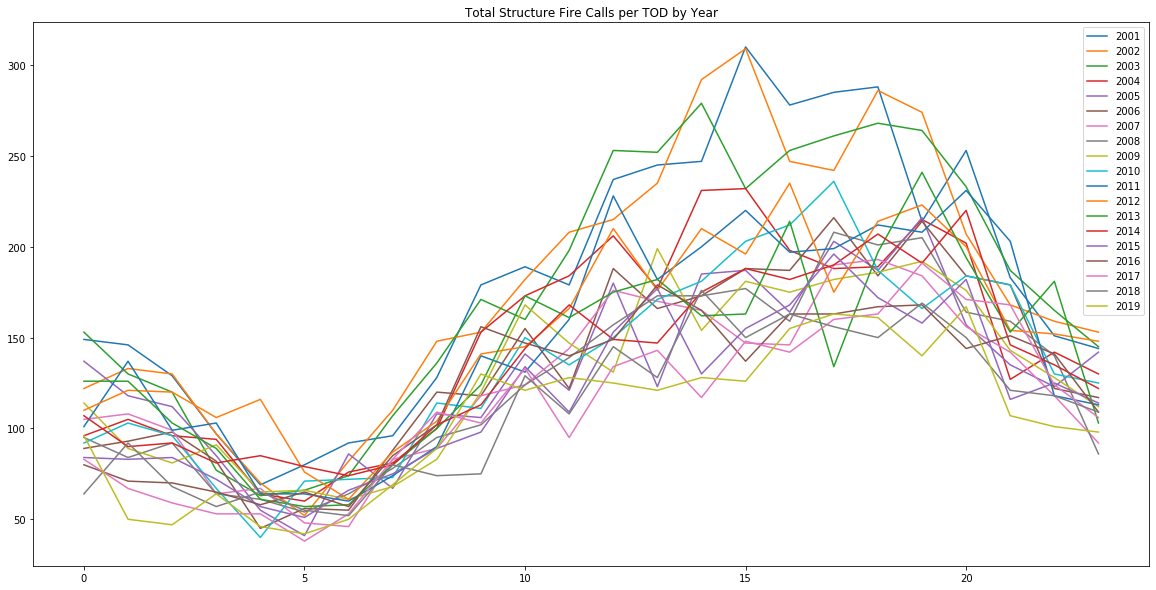

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df[df['Call Type'] == 'Structure Fire']
for i in range(2001,2020):
    ax.plot(df1[df1['Call Date'].dt.year == i]['Received DtTm'].dt.hour.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Structure Fire Calls per TOD by Year')

Text(0.5, 1.0, 'Total Alarm Calls per TOD by Year')

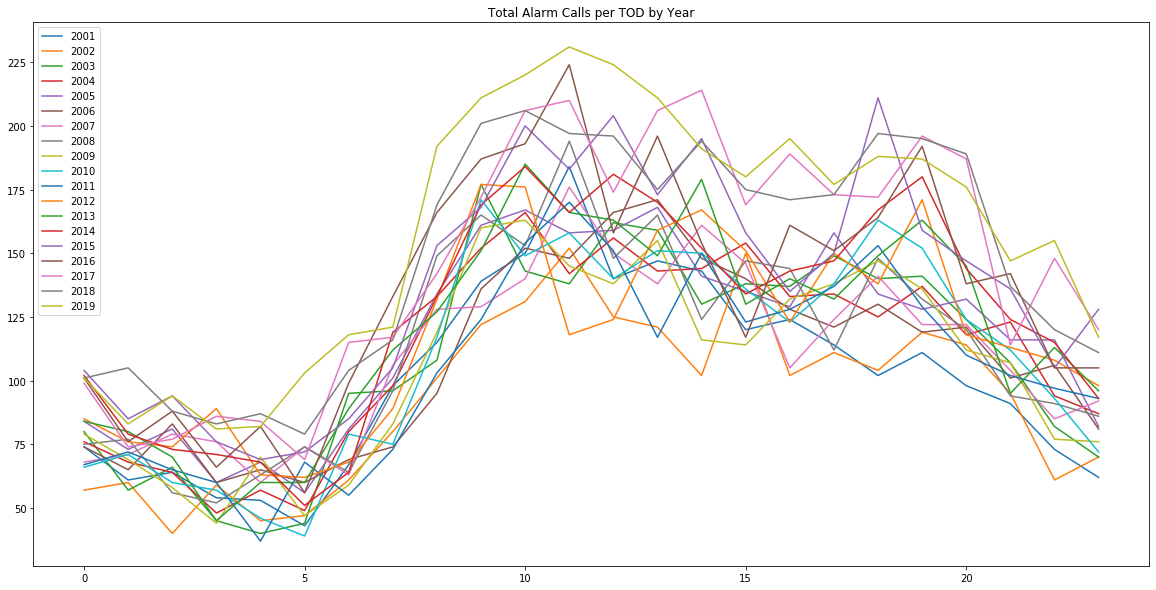

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df[df['Call Type'] == 'Alarms']
for i in range(2001,2020):
    ax.plot(df1[df1['Call Date'].dt.year == i]['Received DtTm'].dt.hour.value_counts().sort_index())
ax.legend([i for i in range(2001,2020)])
ax.set_title('Total Alarm Calls per TOD by Year')

Text(0.5, 1.0, 'Total Calls per TOD by Month')

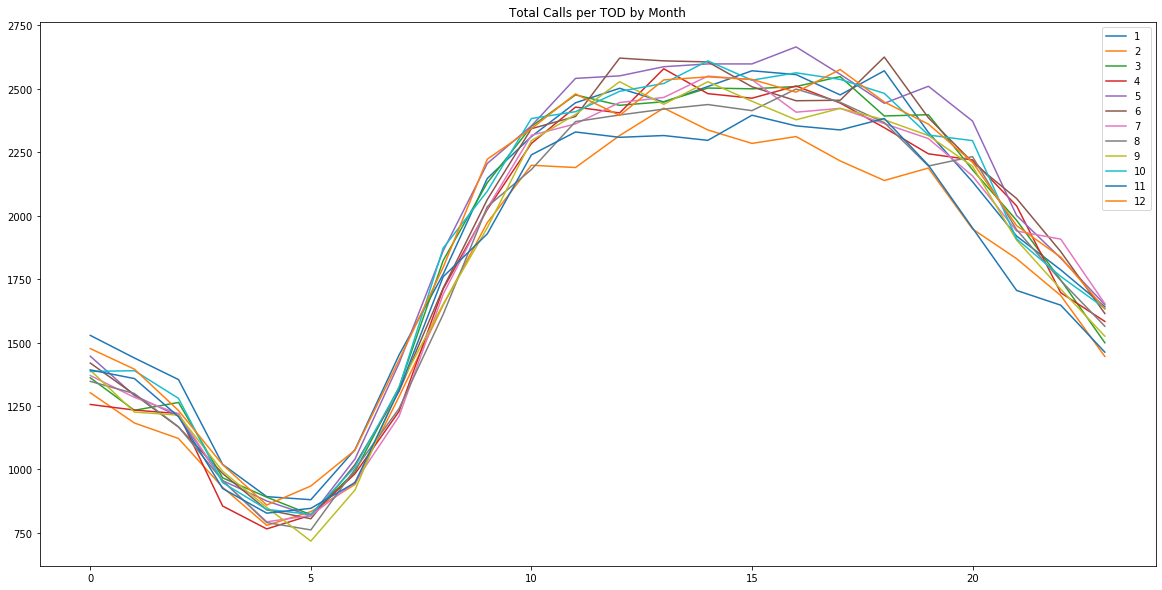

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
#df1 = df[df['Call Type'] == 'Alarms']
for i in range(1,13):
    ax.plot(df[df['Call Date'].dt.month == i]['Received DtTm'].dt.hour.value_counts().sort_index())
ax.legend([i for i in range(1,13)])
ax.set_title('Total Calls per TOD by Month')

## ARIMA

In [188]:
grouped_day = df.groupby(by=['Call Type', 'Call Date'])

series = grouped_day['Unit ID'].count().loc['Alarms']


In [189]:
def plot_trend_data(ax, name, series):
    ax.plot(series.index.date, series)
    ax.set_title("Incidents of Type {}".format(name))
    #ax.set_ylim((0, 100))

def fit_moving_average_trend(series, window=6):
#    return pd.rolling_mean(series, window, center=True)
    return series.rolling(window, center=True).mean()

def plot_moving_average_trend(ax, name, series, window=6):
    moving_average_trend = fit_moving_average_trend(series, window)
    plot_trend_data(ax, name, series)
    ax.plot(series.index.date, moving_average_trend)

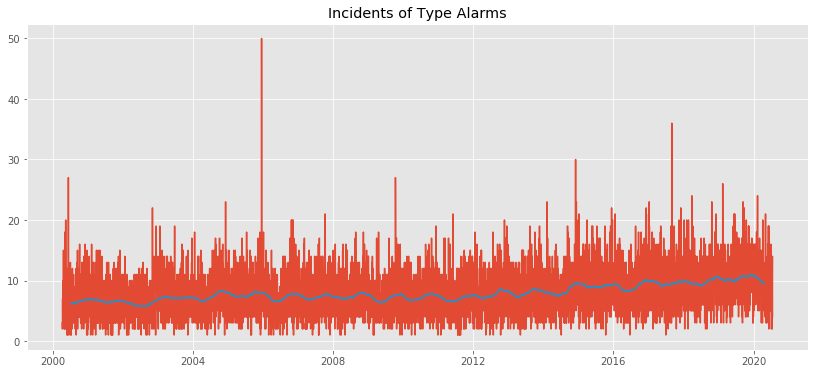

In [193]:
fig, axs = plt.subplots(figsize=(14, 6))
plot_moving_average_trend(axs, 'Alarms', series, window=180)

In [191]:
def create_monthly_dummies(series):
    month = series.index.month
    # Only take 11 of the 12 dummies to avoid strict colinearity.
    return pd.get_dummies(month).ix[:, :11]
def fit_seasonal_trend(series):
    dummies = create_monthly_dummies(series)
    X = sm.add_constant(dummies.values, prepend=False)
    seasonal_model = sm.OLS(series.values, X).fit()
    return seasonal_model.predict(X)
def plot_seasonal_trend(ax, name, series):
    seasons_average_trend = fit_seasonal_trend(series)
    plot_trend_data(ax, name, series, )
    ax.plot(series.index.date, seasons_average_trend, '-')

/home/christopher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/christopher/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


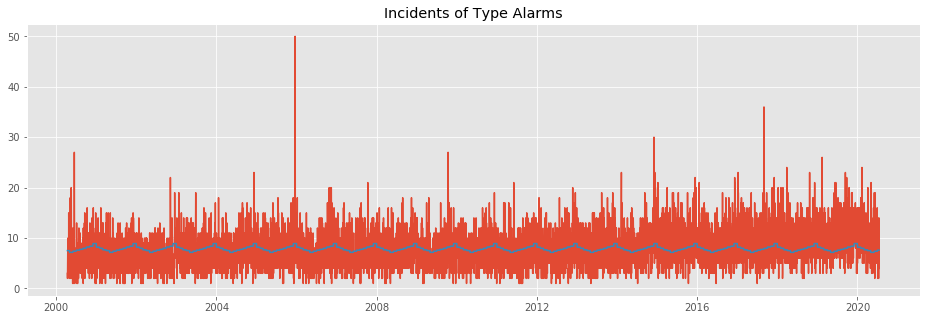

In [192]:
grouped_day = df.groupby(by=['Call Type', 'Call Date'])

series = grouped_day['Unit ID'].count().loc['Alarms']

fig, axs = plt.subplots(figsize=(16, 5))

plot_seasonal_trend(axs, 'Alarms', series)


In [39]:
def plot_shared_yscales(axs, x, ys, titles):
    ymiddles =  [ (y.max()+y.min())/2 for y in ys ]
    yrange = max( (y.max()-y.min())/2 for y in ys )
    for ax, y, title, ymiddle in zip(axs, ys, titles, ymiddles):
        ax.plot(x, y)
        ax.set_title(title)
        ax.set_ylim((ymiddle-yrange, ymiddle+yrange))

def plot_seasonal_decomposition(axs, series, sd):
    plot_shared_yscales(axs,
                        series.index,
                        [series, sd.trend, sd.seasonal, sd.resid],
                        ["Raw Series", "Trend Component $T_t$", "Seasonal Component $S_t$", "Residual Component $R_t$"])




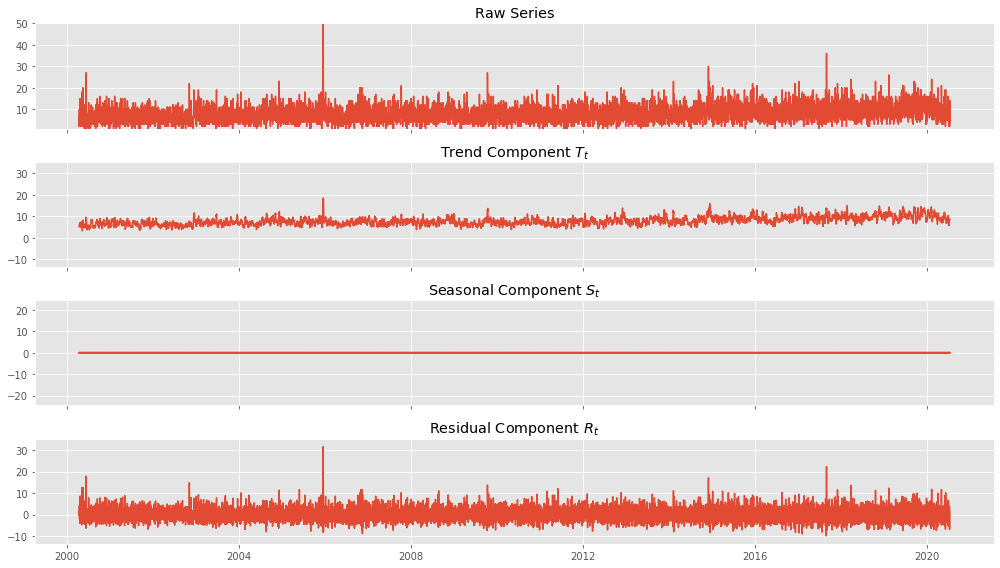

In [194]:
fig, axs = plt.subplots(4, figsize=(14, 8), sharex=True)

series_decomposition = sm.tsa.seasonal_decompose(series, freq=7)

plot_seasonal_decomposition(axs, series, series_decomposition)
plt.tight_layout()



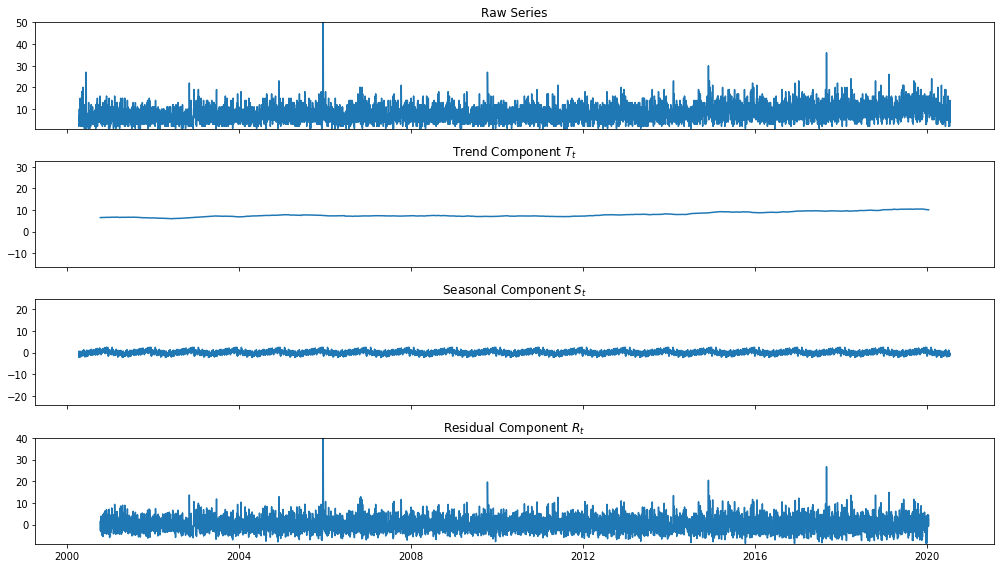

In [41]:
fig, axs = plt.subplots(4, figsize=(14, 8), sharex=True)

series_decomposition = sm.tsa.seasonal_decompose(series, freq=365)

plot_seasonal_decomposition(axs, series, series_decomposition)
plt.tight_layout()

In [43]:
#try with it grouped by day and hour
hour_series = pd.Series(df['Unit ID'].values, index = df['Received DtTm'])

hour_count = hour_series.resample('H').count()

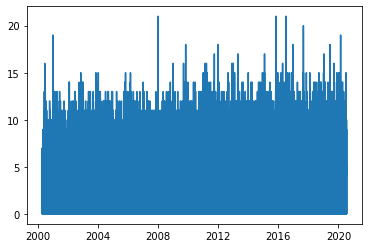

In [44]:
plt.plot(hour_count)

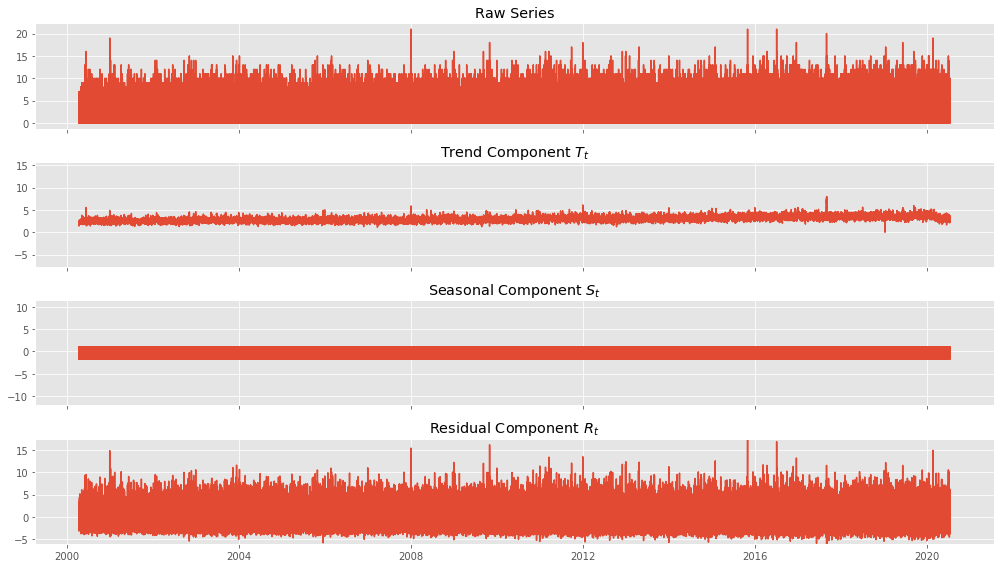

In [195]:
fig, axs = plt.subplots(4, figsize=(14, 8), sharex=True)

series_decomposition = sm.tsa.seasonal_decompose(hour_count, freq=24)

plot_seasonal_decomposition(axs, hour_count, series_decomposition)
plt.tight_layout()

Text(0.5, 1.0, 'Seasonality of Hour of Day Over Entire Dataset')

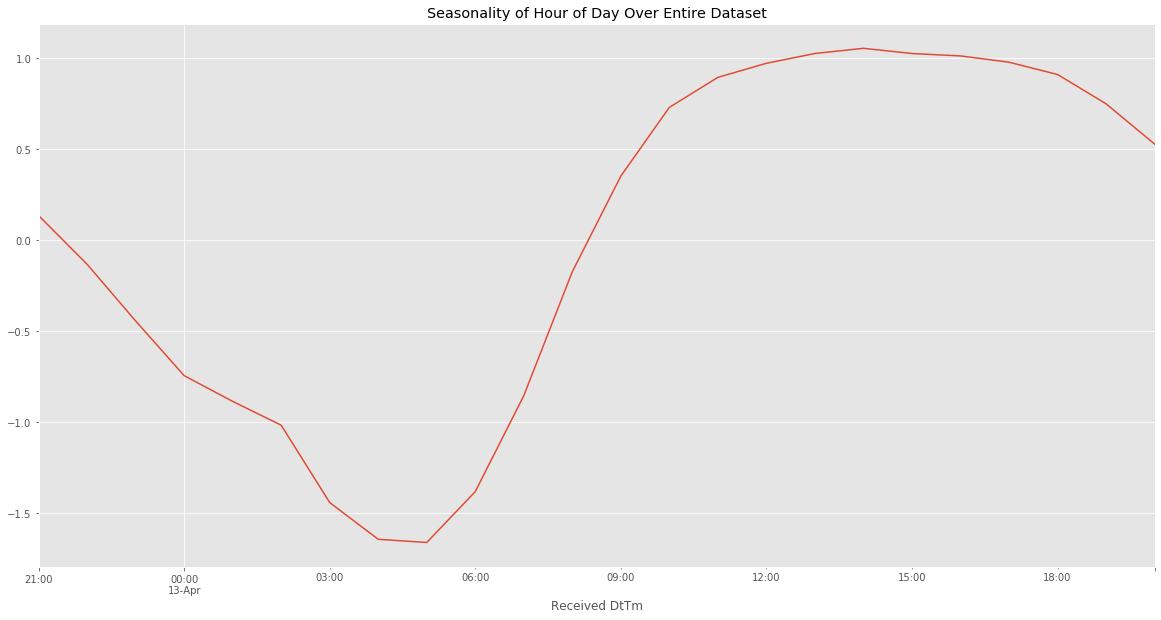

In [201]:
series_decomposition.seasonal[0:24].plot(figsize=(20,10))
plt.title('Seasonality of Hour of Day Over Entire Dataset')

In [231]:
#try with it grouped by day and hour
series = pd.Series(df['Unit ID'].values, index = df['Received DtTm'])

hour_count = series.resample('H').count()

In [232]:
test = sm.tsa.stattools.adfuller(hour_count.diff()[2:])
test[1]
plt.style.use('ggplot')

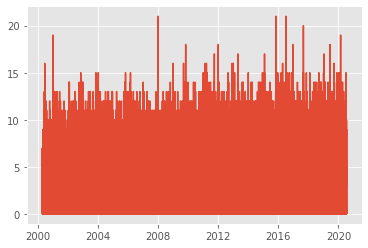

In [233]:
plt.plot(hour_count[2:-2])

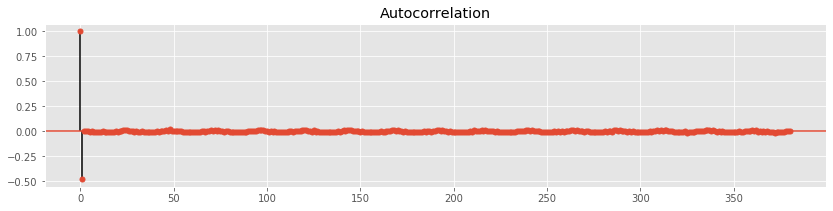

In [236]:
fig, ax = plt.subplots(1, figsize=(14, 3))
_ = sm.graphics.tsa.plot_acf(hour_count.diff()[3:-1], lags=380, ax=ax, alpha = 0.05)

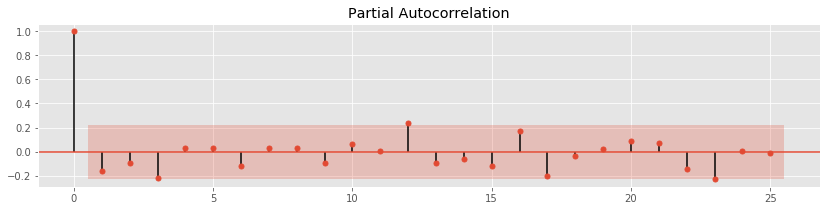

In [110]:
fig, ax = plt.subplots(1, figsize=(14, 3))
_ = sm.graphics.tsa.plot_pacf(month_count.diff()[3:-1], lags=25, ax=ax, alpha=0.05)

In [265]:
hour_model = ARIMA(hour_count[3:-1], order=(8,2,1))

In [266]:
hour_arima_fit = hour_model.fit(start_ar_lags=20)

In [267]:
hour_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:               177584
Model:                 ARIMA(8, 2, 1)   Log Likelihood             -396239.731
Method:                       css-mle   S.D. of innovations              2.253
Date:                Tue, 25 Aug 2020   AIC                         792501.462
Time:                        23:23:24   BIC                         792612.421
Sample:                    04-13-2000   HQIC                        792534.289
                         - 07-16-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.053e-09   7.94e-07     -0.008      0.994   -1.56e-06    1.55e-06
ar.L1.D2.y    -0.7144      0.002   -301.305      0.000      -0.719      -0.710
ar.L2.D2.y    -0.4955      0.003   -170.325      0.000      -0.501      -0.490
ar.L3.D2.y    -0.3377      0.003   -108.019      0.000      -0.344      -0.332
ar.L4.D2.y    -0.2303      0.003    -71.844      0.000      -0.237      -0.224
ar.L5.D2.y    -0.1613      0.003    -50.336      0.000      -0.168      -0.155
ar.L6.D2.y    -0.1130      0.003    -36.127      0.000      -0.119      -0.107
ar.L7.D2.y    -0.0779      0.003    -26.784      0.000      -0.084      -0.072
ar.L8.D2.y    -0.0426      0.002    -17.988      0.000      -0.047      -0.038
ma.L1.D2.y    -0.9995      0.001  -1357.509      0.000      -1.001      -0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0987           -0.9505j            1.4528           -0.1135
AR.2            1.0987           +0.9505j            1.4528            0.1135
AR.3            0.2030           -1.4545j            1.4686           -0.2279
AR.4            0.2030           +1.4545j            1.4686            0.2279
AR.5           -0.7823           -1.2745j            1.4954           -0.3376
AR.6           -0.7823           +1.2745j            1.4954            0.3376
AR.7           -1.4329           -0.5002j            1.5177           -0.4465
AR.8           -1.4329           +0.5002j            1.5177            0.4465
MA.1            1.0005           +0.0000j            1.0005            0.0000
-----------------------------------------------------------------------------
"""

In [268]:
resids = pd.DataFrame(hour_arima_fit.resid)

In [269]:
resids


0
Received DtTm                    
2000-04-13 02:00:00  6.052551e-09
2000-04-13 03:00:00 -1.000000e+00
2000-04-13 04:00:00  1.007228e+00
2000-04-13 05:00:00 -5.103443e-01
2000-04-13 06:00:00  9.380374e-01
...                           ...
2020-07-16 05:00:00 -2.209109e-01
2020-07-16 06:00:00  8.885307e-01
2020-07-16 07:00:00 -1.357149e+00
2020-07-16 08:00:00  2.086744e+00
2020-07-16 09:00:00  6.526263e+00

[177584 rows x 1 columns]

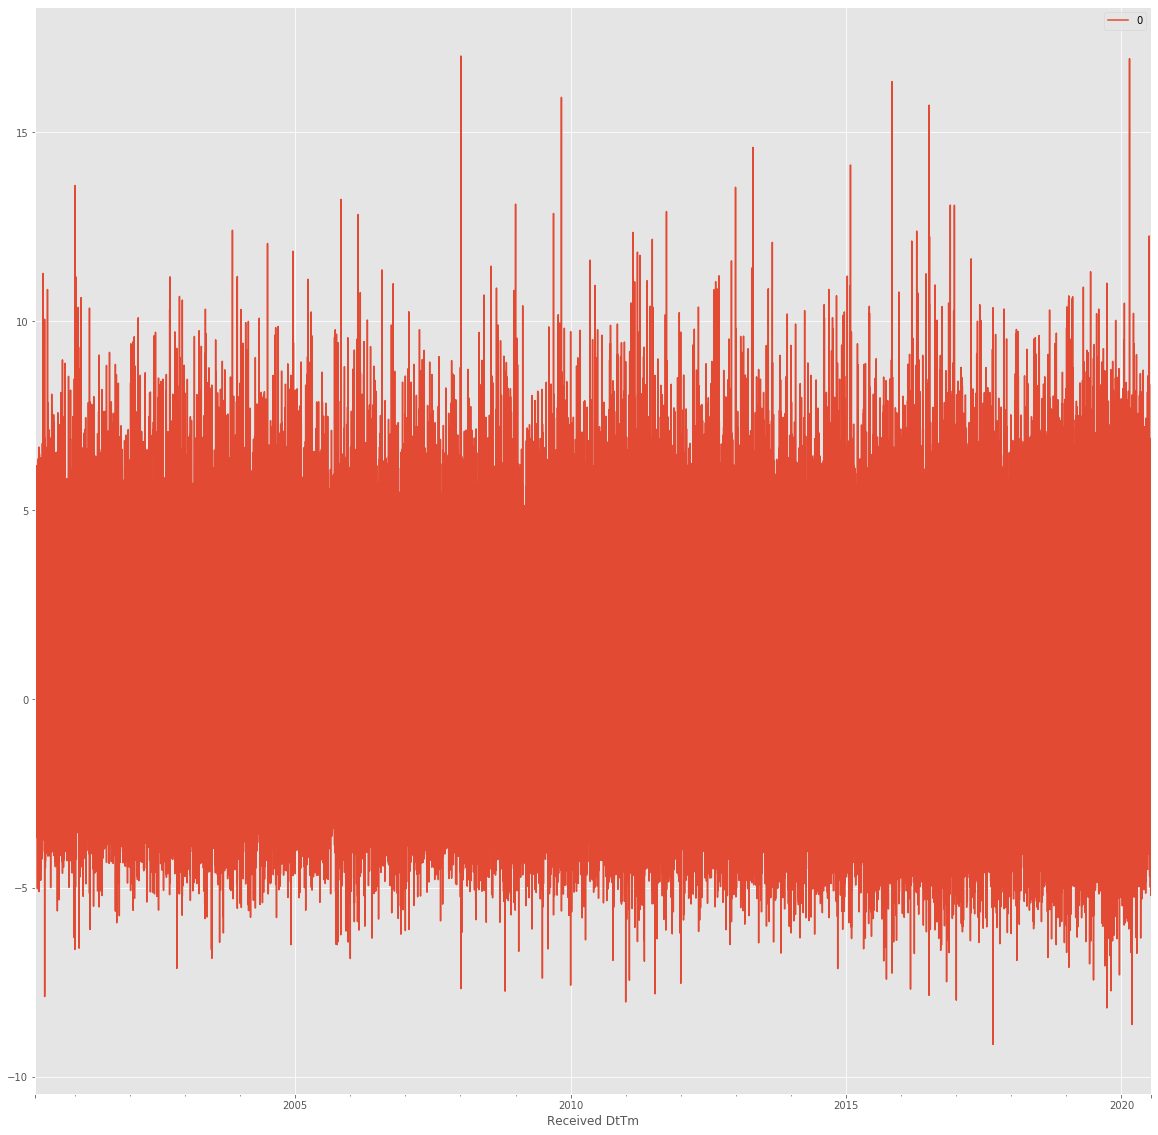

In [270]:
resids.plot(figsize=(20,20))

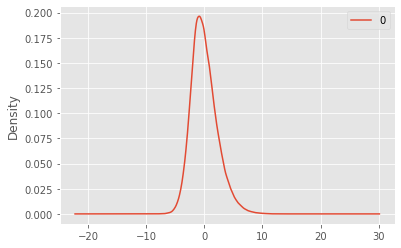

In [271]:
resids.plot(kind='kde')

In [272]:
resids.describe()

0
count  177584.000000
mean       -0.000073
std         2.253144
min        -9.144058
25%        -1.551798
50%        -0.262724
75%         1.299095
max        17.017385

### Prophet

In [275]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [276]:
m = Prophet()

In [295]:
proph_frame = pd.DataFrame(hour_count)

In [296]:
proph_frame.reset_index(level=0, inplace=True)
proph_frame.columns = ['ds','y']
proph_frame

ds  y
0      2000-04-12 21:00:00  5
1      2000-04-12 22:00:00  2
2      2000-04-12 23:00:00  3
3      2000-04-13 00:00:00  1
4      2000-04-13 01:00:00  1
...                    ... ..
177585 2020-07-16 06:00:00  2
177586 2020-07-16 07:00:00  0
177587 2020-07-16 08:00:00  3
177588 2020-07-16 09:00:00  8
177589 2020-07-16 10:00:00  4

[177590 rows x 2 columns]

In [297]:
m.fit(proph_frame)

In [303]:
future=m.make_future_dataframe(periods=72, freq='H')
future

ds
0      2000-04-12 21:00:00
1      2000-04-12 22:00:00
2      2000-04-12 23:00:00
3      2000-04-13 00:00:00
4      2000-04-13 01:00:00
...                    ...
177657 2020-07-19 06:00:00
177658 2020-07-19 07:00:00
177659 2020-07-19 08:00:00
177660 2020-07-19 09:00:00
177661 2020-07-19 10:00:00

[177662 rows x 1 columns]

In [304]:
forecast = m.predict(future)

In [307]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0      2000-04-12 21:00:00  2.488495   -0.053813    5.059916     2.488495   
1      2000-04-12 22:00:00  2.488497   -0.276536    4.620866     2.488497   
2      2000-04-12 23:00:00  2.488499   -0.602521    4.360830     2.488499   
3      2000-04-13 00:00:00  2.488501   -0.938710    4.433773     2.488501   
4      2000-04-13 01:00:00  2.488503   -1.021679    4.215800     2.488503   
...                    ...       ...         ...         ...          ...   
177657 2020-07-19 06:00:00  3.532216   -0.602636    4.461621     3.532216   
177658 2020-07-19 07:00:00  3.532216   -0.320744    5.115810     3.532216   
177659 2020-07-19 08:00:00  3.532216    0.685523    5.717797     3.532216   
177660 2020-07-19 09:00:00  3.532216    1.250293    6.230195     3.532216   
177661 2020-07-19 10:00:00  3.532216    1.426727    6.681816     3.532216   

        trend_upper  additive_terms  additive_terms_lower  \
0          2.488495        0.098469              0.098469   
1          2.488497       -0.259080             -0.259080   
2          2.488499       -0.555614             -0.555614   
3          2.488501       -0.766377             -0.766377   
4          2.488503       -0.948020             -0.948020   
...             ...             ...                   ...   
177657     3.532216       -1.543358             -1.543358   
177658     3.532216       -0.998659             -0.998659   
177659     3.532216       -0.355828             -0.355828   
177660     3.532216        0.193075              0.193075   
177661     3.532216        0.545501              0.545501   

        additive_terms_upper     daily  ...    weekly  weekly_lower  \
0                   0.098469  0.182214  ... -0.033676     -0.033676   
1                  -0.259080 -0.176250  ... -0.032824     -0.032824   
2                  -0.555614 -0.473648  ... -0.032024     -0.032024   
3                  -0.766377 -0.685234  ... -0.031264     -0.031264   
4                  -0.948020 -0.867673  ... -0.030531     -0.030531   
...                      ...       ...  ...       ...           ...   
177657             -1.543358 -1.390677  ... -0.029366     -0.029366   
177658             -0.998659 -0.838947  ... -0.036307     -0.036307   
177659             -0.355828 -0.189558  ... -0.042776     -0.042776   
177660              0.193075  0.365403  ... -0.048746     -0.048746   
177661              0.545501  0.723363  ... -0.054194     -0.054194   

        weekly_upper    yearly  yearly_lower  yearly_upper  \
0          -0.033676 -0.050069     -0.050069     -0.050069   
1          -0.032824 -0.050006     -0.050006     -0.050006   
2          -0.032024 -0.049942     -0.049942     -0.049942   
3          -0.031264 -0.049879     -0.049879     -0.049879   
4          -0.030531 -0.049816     -0.049816     -0.049816   
...              ...       ...           ...           ...   
177657     -0.029366 -0.123314     -0.123314     -0.123314   
177658     -0.036307 -0.123405     -0.123405     -0.123405   
177659     -0.042776 -0.123494     -0.123494     -0.123494   
177660     -0.048746 -0.123582     -0.123582     -0.123582   
177661     -0.054194 -0.123669     -0.123669     -0.123669   

        multiplicative_terms  multiplicative_terms_lower  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   
...                      ...                         ...   
177657                   0.0                         0.0   
177658                   0.0                         0.0   
177659                   0.0                         0.0   
177660                   0.0                         0.0   
177661                   0.0                         0.0   

        multiplicative_terms_upper      yhat  


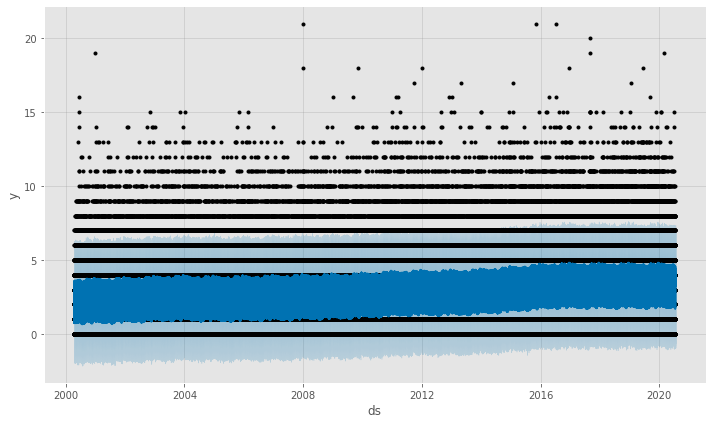

In [305]:
fig1 = m.plot(forecast)

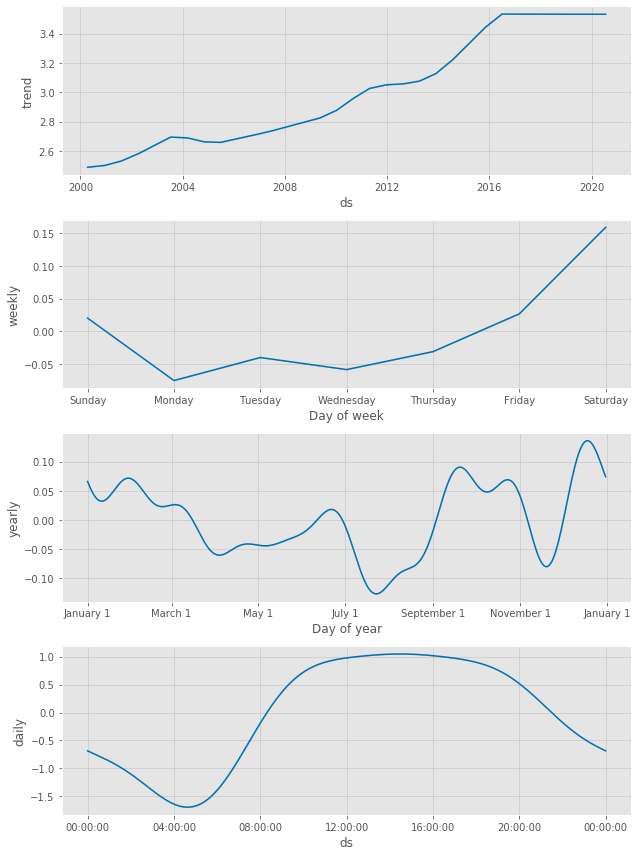

In [306]:
d